In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("customer_churn.csv")
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [5]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['customerID'].duplicated().sum()

np.int64(0)

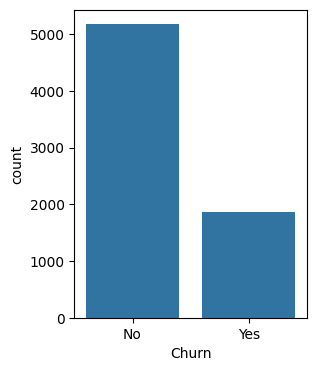

In [31]:
plt.figure(figsize=(3,4))
sns.countplot(x='Churn',data=df)
plt.show()

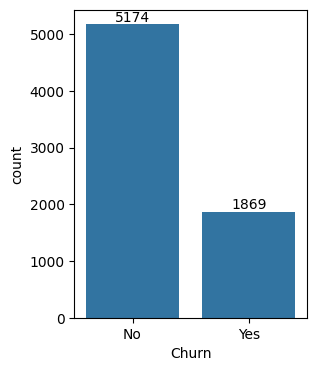

In [30]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.show()

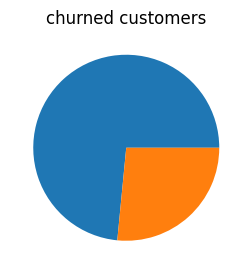

In [29]:
plt.figure(figsize=(3,4))
gb=df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'])
plt.title("churned customers")
plt.show()

In [18]:
gb

,Churn
Churn,
No,5174
Yes,1869


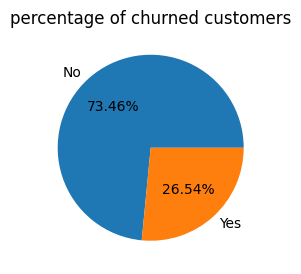

In [28]:
plt.figure(figsize=(3,4))
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("percentage of churned customers")
plt.show()

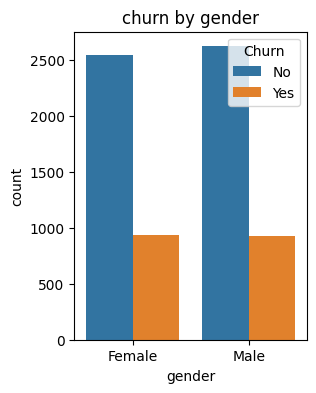

In [32]:
plt.figure(figsize=(3,4))
sns.countplot(x='gender',data=df,hue='Churn')
plt.title("churn by gender")
plt.show()

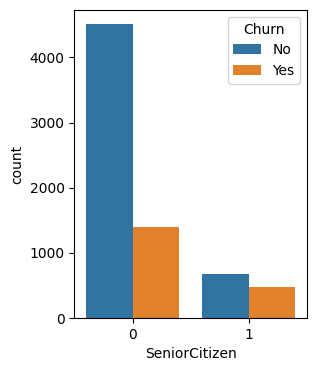

In [34]:
plt.figure(figsize=(3,4))
sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
plt.title("churn by senior citizen")
plt.show()

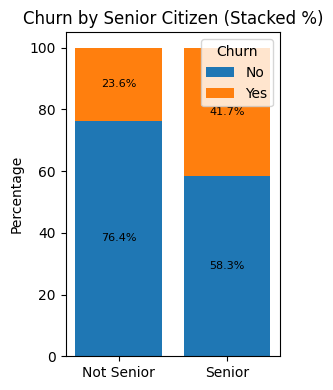

In [35]:
# Step 1: Create a crosstab of counts
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Normalize by row to get percentages
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# Step 3: Plot
fig, ax = plt.subplots(figsize=(3, 4))

# Bottom to help stacking
bottom = pd.Series([0] * ct.shape[0], index=ct.index)

# Plot each Churn category
for churn_status in ct.columns:
    ax.bar(ct.index, ct_pct[churn_status], bottom=bottom, label=churn_status)
    # Add text labels
    for i, (x, y) in enumerate(zip(ct.index, ct_pct[churn_status])):
        ax.text(x, bottom[x] + y / 2, f'{y:.1f}%', ha='center', va='center', fontsize=8)
    bottom += ct_pct[churn_status]

# Labels and legend
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Senior', 'Senior'])
ax.set_ylabel('Percentage')
ax.set_title('Churn by Senior Citizen (Stacked %)')
ax.legend(title='Churn')

plt.tight_layout()
plt.show()

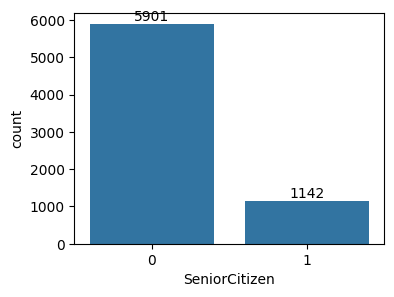

In [47]:
plt.figure(figsize=(4,3))
ax=sns.countplot(x='SeniorCitizen',data=df)
ax.bar_label(ax.containers[0])
plt.show()

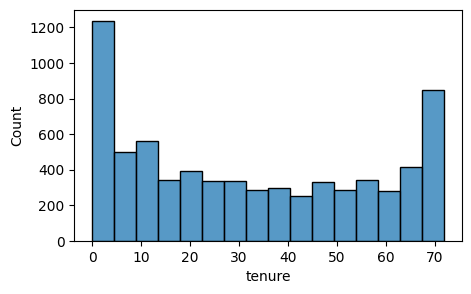

In [41]:
plt.figure(figsize=(5,3))
sns.histplot(x='tenure',data=df)
plt.show()

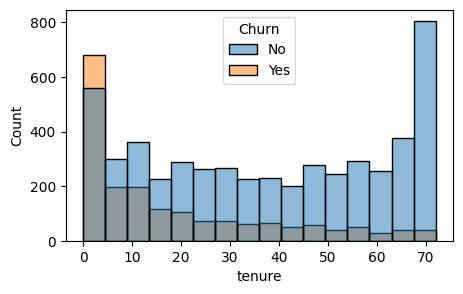

In [44]:
plt.figure(figsize=(5,3))
sns.histplot(x='tenure',data=df,hue='Churn')
plt.show()

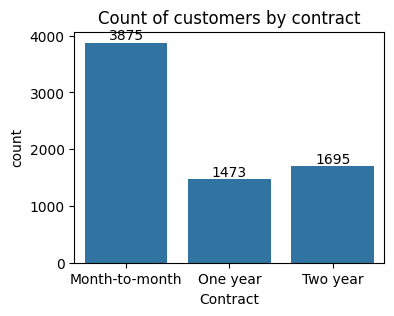

In [53]:
plt.figure(figsize=(4,3))
ax=sns.countplot(x='Contract',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by contract")
plt.show()

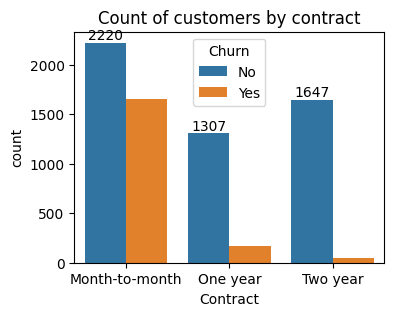

In [54]:
plt.figure(figsize=(4,3))
ax=sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of customers by contract")
plt.show()

In [59]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

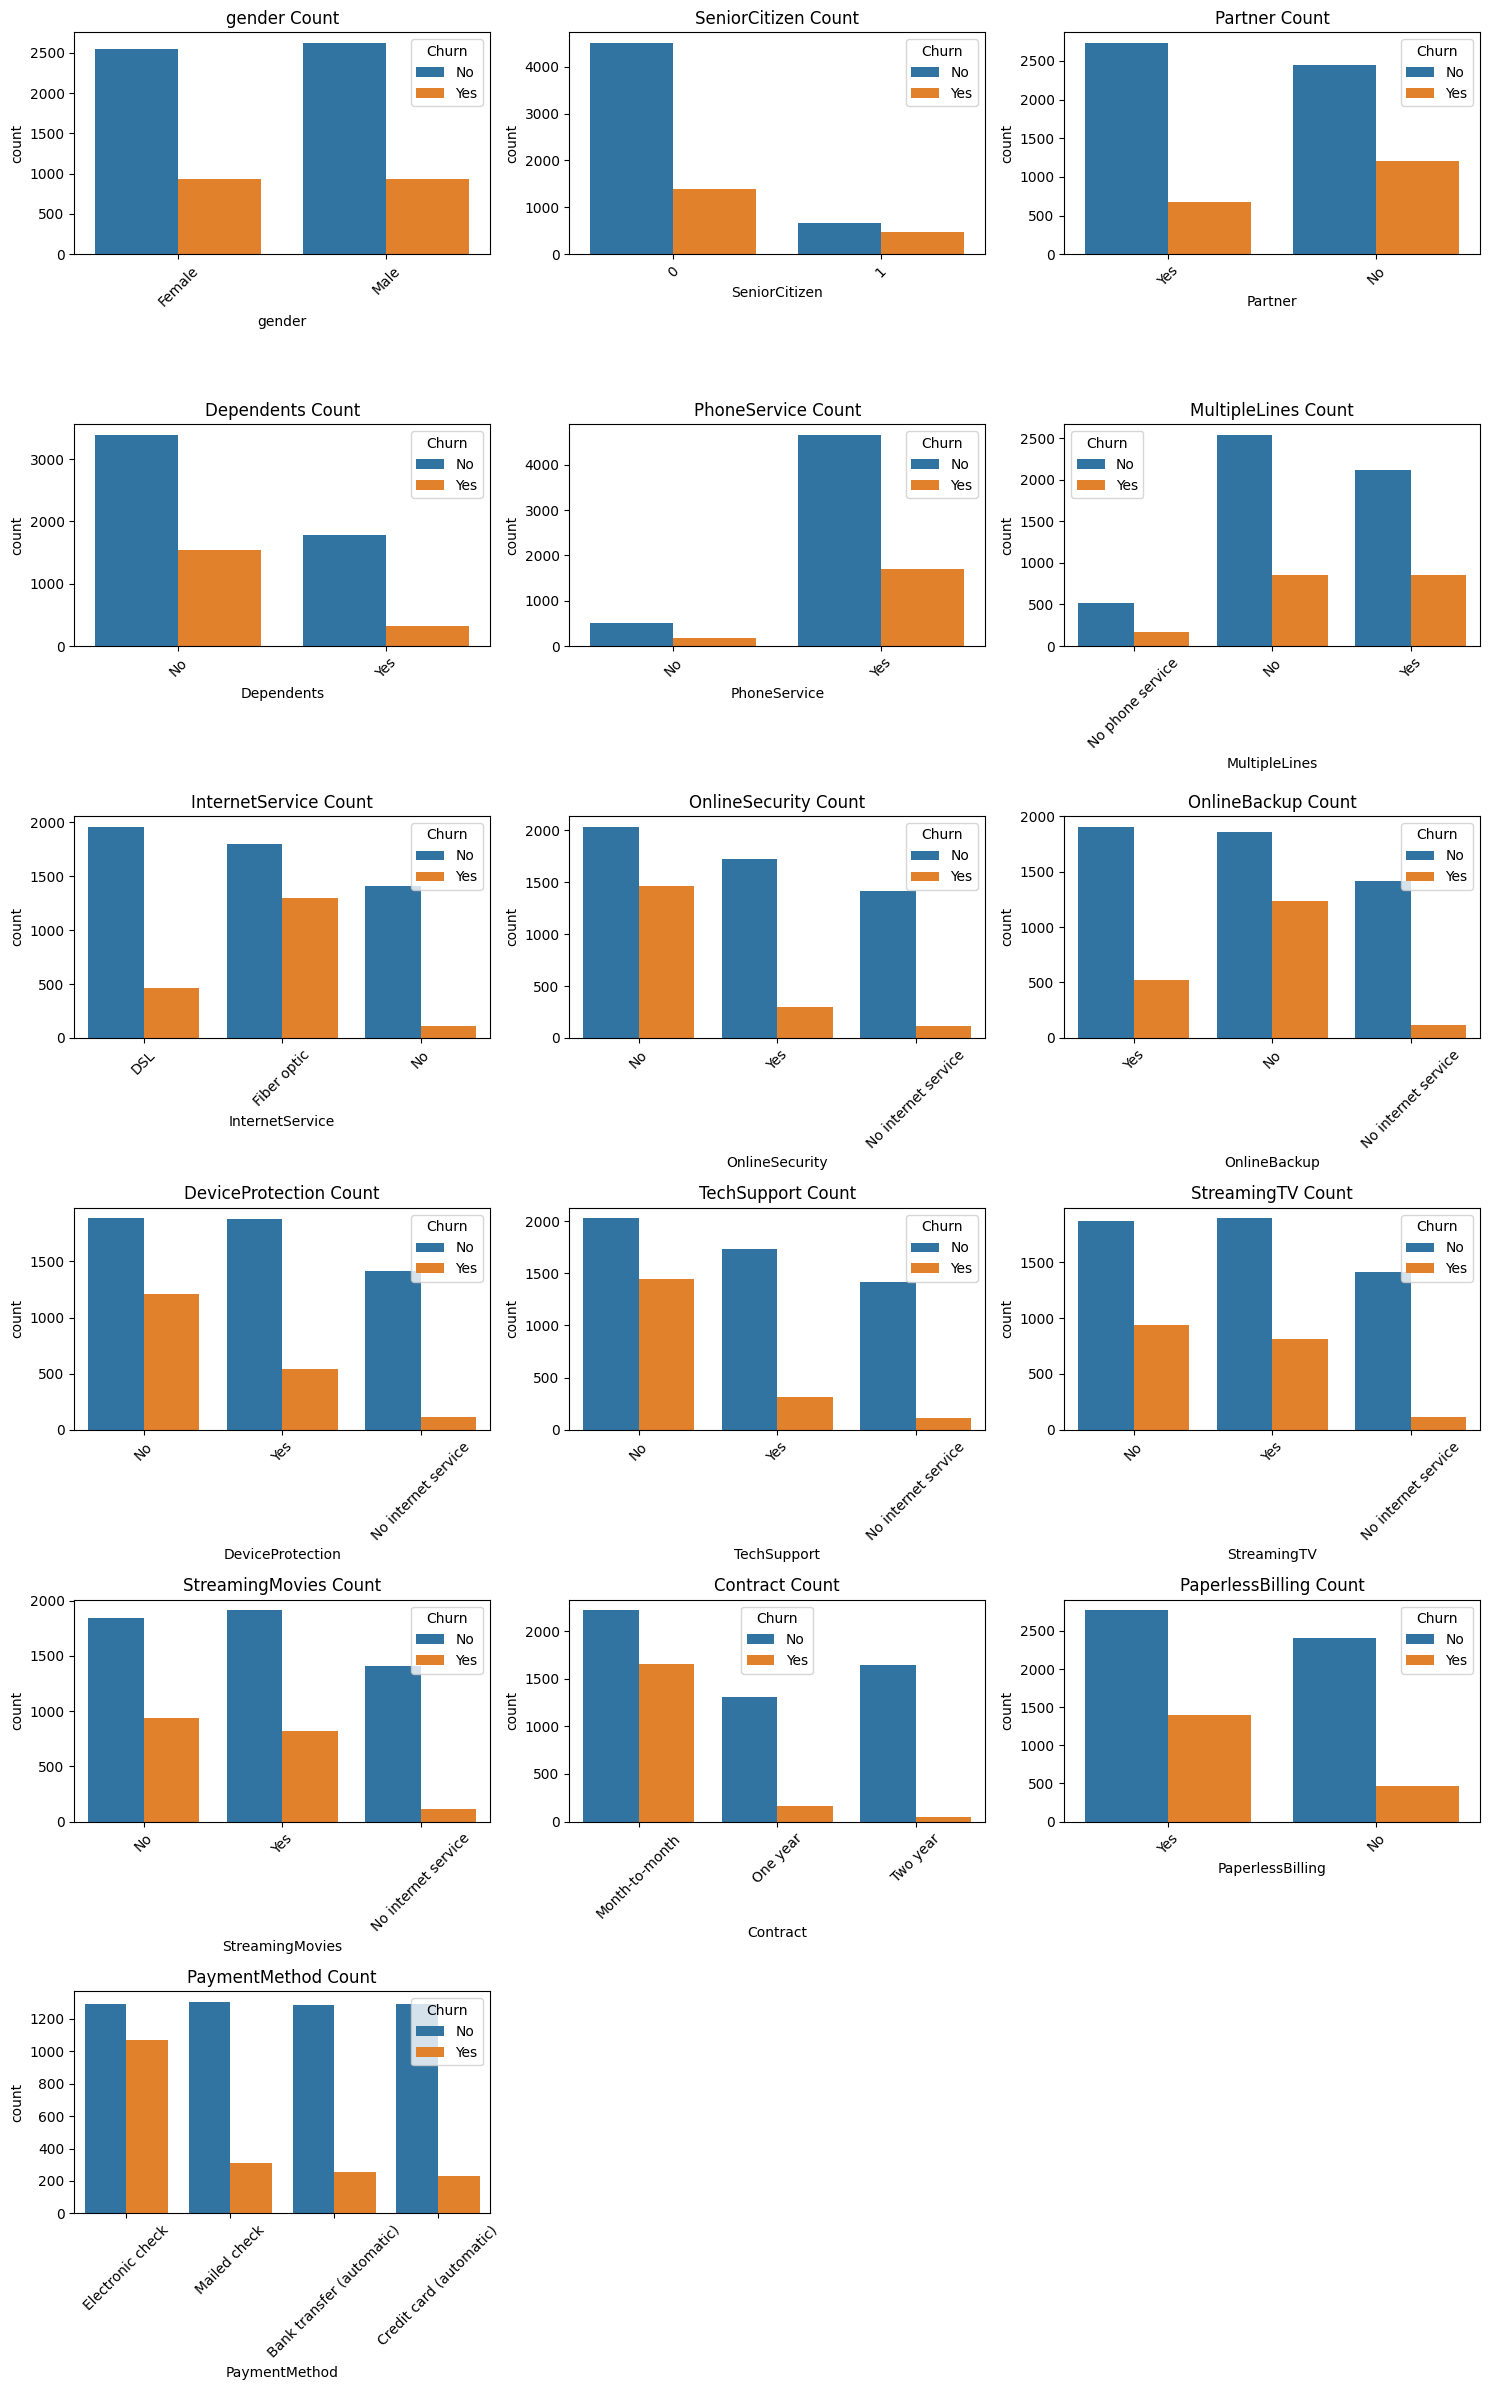

In [61]:
import math
# List of categorical columns you want to plot
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

# Determine grid size
n_cols = 3  # plots per row
n_rows = math.ceil(len(cat_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Plot each countplot
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, hue='Churn', ax=axes[i])
    axes[i].set_title(f'{col} Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The count plots show that churn is generally higher among customers without partners, dependents, or those using fiber optic internet. 
Features like lack of online security, tech support, and month-to-month contracts are strongly associated with higher churn. 
Customers with longer-term contracts and services like tech support are less likely to churn. Paperless billing and electronic check payments also 
correlate with higher churn rates.

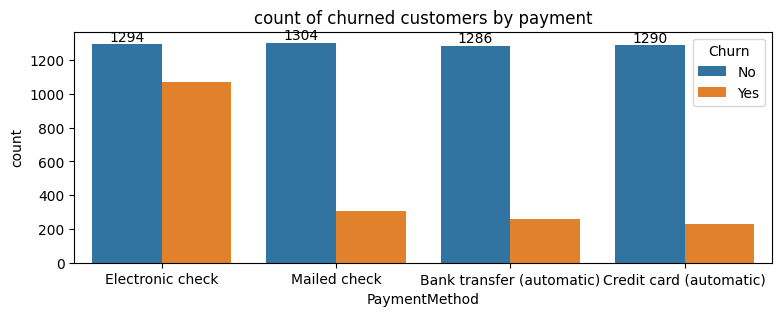

In [65]:
plt.figure(figsize=(9,3))
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("count of churned customers by payment")
plt.show()

customer is likely to churn when he is using electronic ckeck as payment method